In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

In [3]:
data = {'Date': pd.date_range('2021-01-01', periods=500),
        'Category': [random.choice(categories) for _ in range(500)],
        'Likes': np.random.randint(0, 10000, size=500)}

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,Date,Category,Likes
0,2021-01-01,Fitness,821
1,2021-01-02,Culture,7698
2,2021-01-03,Food,2681
3,2021-01-04,Health,7347
4,2021-01-05,Family,7241
...,...,...,...
495,2022-05-11,Fashion,7335
496,2022-05-12,Culture,9872
497,2022-05-13,Culture,493
498,2022-05-14,Music,4177


In [6]:
df.isnull()

,Date,Category,Likes
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
495,False,False,False
496,False,False,False
497,False,False,False
498,False,False,False


In [7]:
df.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,Date,Category,Likes
0,2021-01-01,Fitness,821
1,2021-01-02,Culture,7698
2,2021-01-03,Food,2681
3,2021-01-04,Health,7347
4,2021-01-05,Family,7241
...,...,...,...
495,2022-05-11,Fashion,7335
496,2022-05-12,Culture,9872
497,2022-05-13,Culture,493
498,2022-05-14,Music,4177


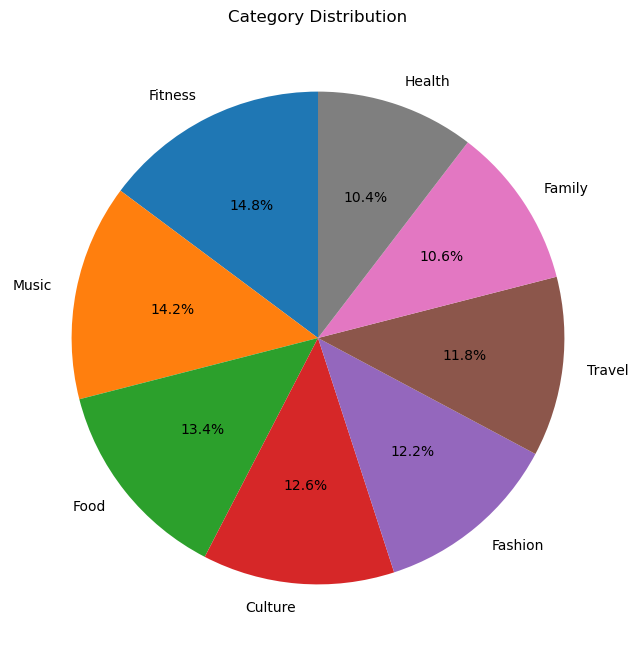

In [10]:
plt.figure(figsize=(8,8))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Category Distribution')
plt.ylabel('')
plt.show()

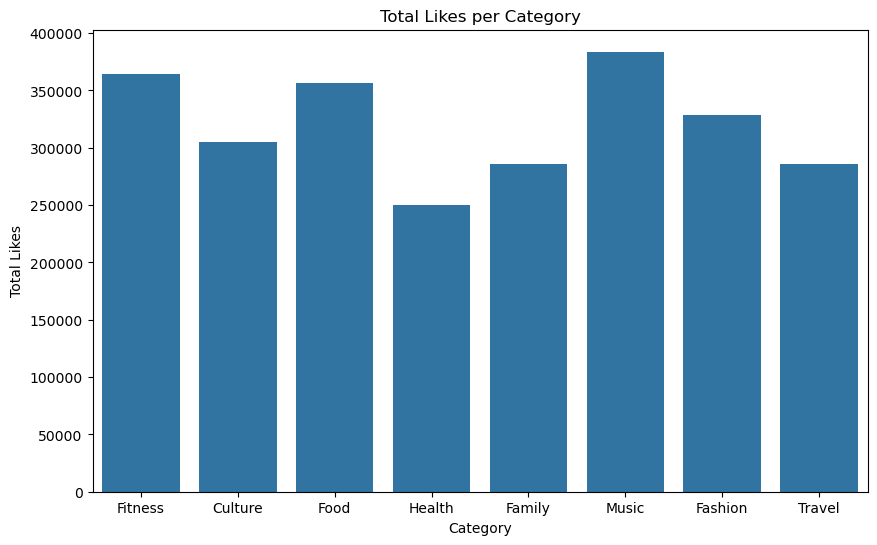

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Likes', estimator=sum, data=df, errorbar=None)
plt.title('Total Likes per Category')
plt.xlabel('Category')
plt.ylabel('Total Likes')
plt.show()

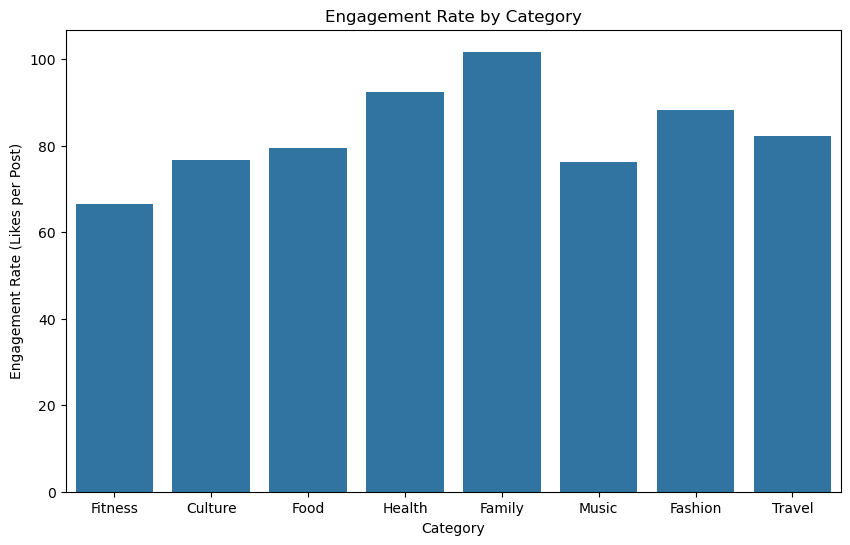

In [18]:
# Calculate engagement rate
df['Engagement'] = df['Likes'] / df.groupby('Category')['Likes'].transform('count')

# engagement rate for each category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Engagement', data=df, errorbar=None)
plt.title('Engagement Rate by Category')
plt.xlabel('Category')
plt.ylabel('Engagement Rate (Likes per Post)')
plt.show()

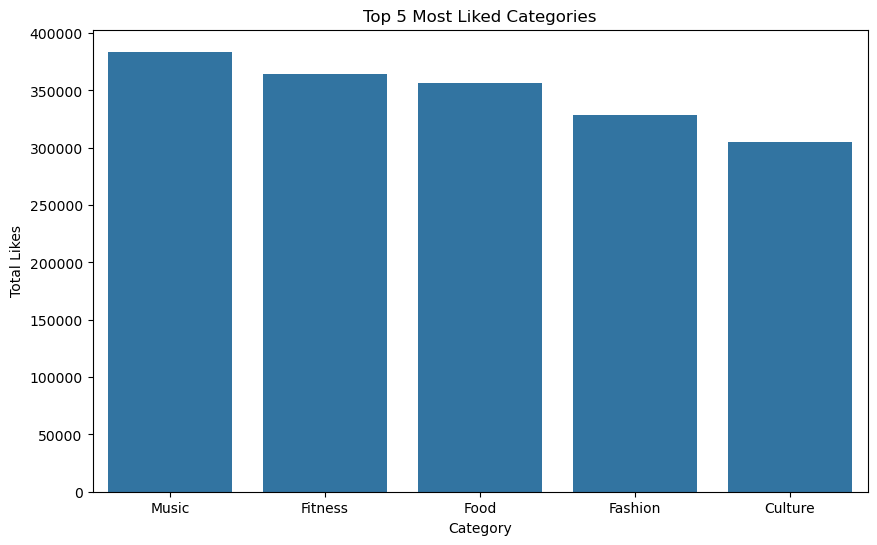

In [30]:
# Group by category and sum the likes
top_categories = df.groupby('Category')['Likes'].sum().sort_values(ascending=False).head(5)

# Plot the top 5 most liked categories
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.index, y=top_categories.values,)
plt.title('Top 5 Most Liked Categories')
plt.xlabel('Category')
plt.ylabel('Total Likes')
plt.show()

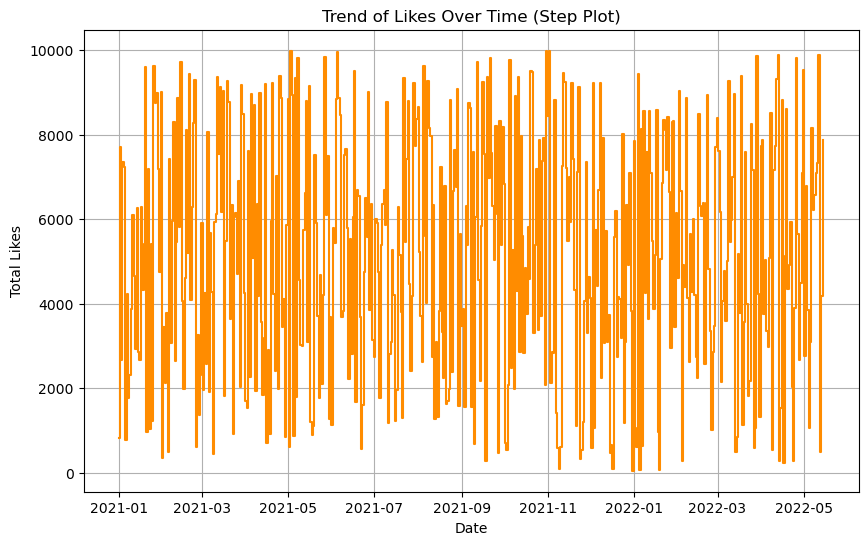

In [29]:
# Group by date and sum the likes
likes_trend = df.groupby('Date')['Likes'].sum()

# Plot the trend of likes over time using a step plot
plt.figure(figsize=(10,6))
plt.step(likes_trend.index, likes_trend.values, color='darkorange', where='mid')
plt.title('Trend of Likes Over Time (Step Plot)')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.grid(True)
plt.show()